In [1]:
import pandas as pd
data = pd.read_excel('redwine.xlsx')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
#匯入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LogisticRegression
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import random

In [3]:
#設定xy
x=data.iloc[:,:11]
y=data["quality"]
# x
# y

In [4]:
pd.unique(data['quality'])

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [6]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
preds_lda=lda.predict(x_test)

In [7]:
print(classification_report(y_test,preds_lda,target_names=["3","4","5","6","7","8"]))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.64      0.74      0.68       130
           6       0.54      0.53      0.53       132
           7       0.36      0.31      0.33        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.26      0.26      0.26       320
weighted avg       0.53      0.56      0.54       320



C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
print(lda.score(x_train,y_train))
print(accuracy_score(y_test,preds_lda))

0.6153244722439406
0.559375


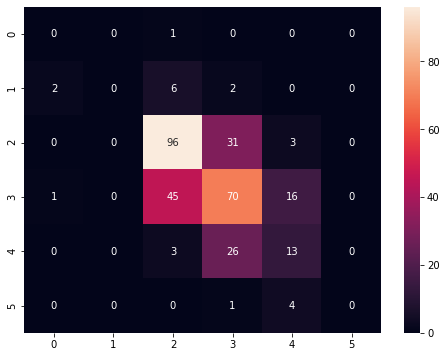

In [10]:
cm=confusion_matrix(y_test,preds_lda)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()